In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv('data/data_dsc.csv')

In [2]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)

random_state = 8
quantile = 0.99
test_size = 0.1

seed_everything(random_state)

In [3]:
df = df[df['IC50'] < df['IC50'].quantile(quantile)]
Y = df['IC50']
X = df[df.columns[4:]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

In [4]:
def score(model):
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    mape = mean_absolute_percentage_error(Y_test, Y_pred)
    print(f"Коэффициент детерминации (R²): {r2}")
    print(f"MAE: {mae}")
    print(f'MAPE: {mape}')

def plotter(model):
    plt.scatter(Y_train, model.predict(X_train),c='green', label='Training')
    plt.plot(Y_train, Y_train, c='black')
    plt.scatter(Y_test, model.predict(X_test),c='red', label='Test')
    plt.xlabel('Actual IC50', fontweight='bold')
    plt.ylabel('Predicted IC50', fontweight='bold')
    plt.legend(loc='upper right', numpoints=1, ncol=3, fontsize=8)

    plt.show()

### Linear models

Коэффициент детерминации (R²): 0.08046015212388702
MAE: 3.0433496647995772
MAPE: 74.31193887292629


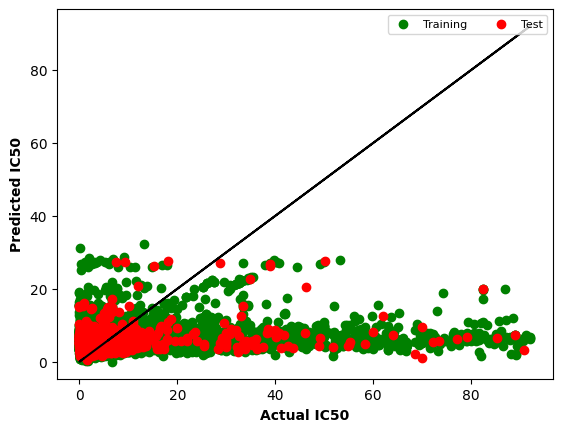

In [5]:
model = RidgeCV(alphas=np.logspace(-6, 6, 13))
model.fit(X_train, Y_train)
score(model)
plotter(model)

In [6]:
model = LassoCV(alphas=np.logspace(-6, 6, 13))
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score(model)

Коэффициент детерминации (R²): 0.0806253985391866
MAE: 3.0427620401158606
MAPE: 74.37879682068697


c:\Users\Даня\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+02, tolerance: 1.831e+02
  model = cd_fast.enet_coordinate_descent(


### CatBoost

Коэффициент детерминации (R²): 0.22885690677479664
MAE: 2.883316789780923
MAPE: 24.50212420314437


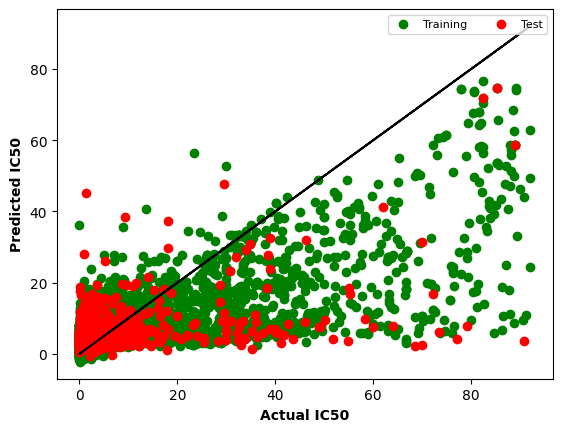

In [7]:
model = CatBoostRegressor(iterations=10000, custom_metric=['R2', 'MAE'])
model.fit(X_train, Y_train, eval_set=(X_test, Y_test), silent=True)
score(model)
plotter(model)

In [8]:
feature_importance = model.get_feature_importance(Pool(X_train, Y_train))
feature_importances = pd.Series(feature_importance, index=X.columns).sort_values()

<BarContainer object of 15 artists>

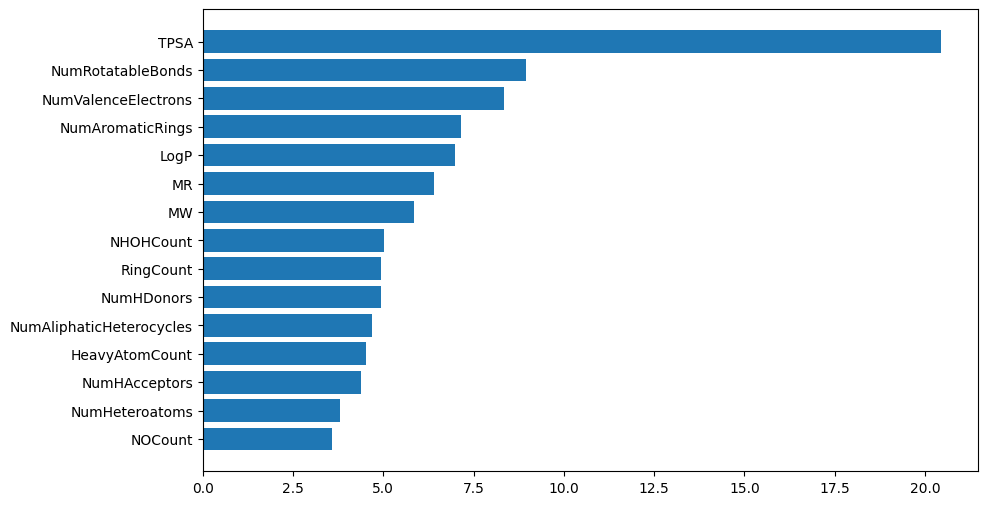

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)

### Trees

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


Коэффициент детерминации (R²): 0.1077140126917635
MAE: 2.7287522949606413
MAPE: 47.519806902569364


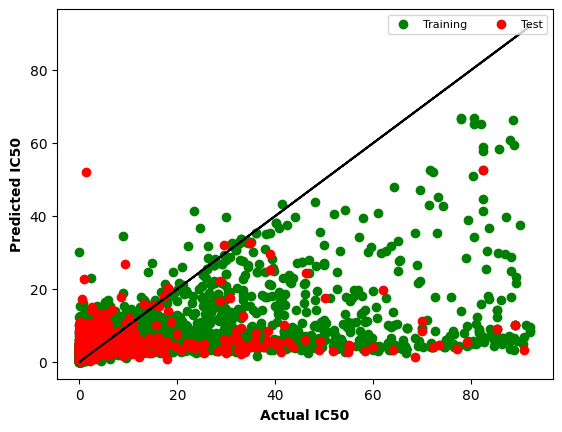

In [10]:
model = RandomForestRegressor(criterion='absolute_error', verbose=1, n_jobs=-1, max_depth=12)
model.fit(X_train, Y_train)
score(model)
plotter(model)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


Коэффициент детерминации (R²): 0.11357352504943274
MAE: 2.6855568287955034
MAPE: 29.324242288610716


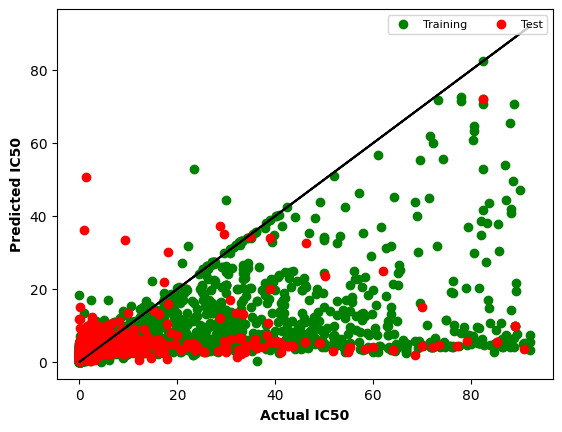

In [11]:
model = ExtraTreesRegressor(criterion='absolute_error', verbose=1, n_jobs=-1, max_depth=12)
model.fit(X_train, Y_train)
score(model)
plotter(model)

### KNNs

Коэффициент детерминации (R²): -0.18322445529603226
MAE: 3.577515985250416
MAPE: 25.30749210860266
Коэффициент детерминации (R²): -0.009312416772481846
MAE: 3.3497374824414217
MAPE: 37.07514463757495
Коэффициент детерминации (R²): 0.04006098896707766
MAE: 3.2832773453971864
MAPE: 43.37408838164048
Коэффициент детерминации (R²): 0.05437238235813879
MAE: 3.203958685900333
MAPE: 48.54340662020893
Коэффициент детерминации (R²): 0.058998420928783823
MAE: 3.166067078412882
MAPE: 49.22100827214182
Коэффициент детерминации (R²): 0.05861410227689334
MAE: 3.153739554299047
MAPE: 67.63911687401465
Коэффициент детерминации (R²): 0.05849768252503451
MAE: 3.1506097246494806
MAPE: 74.49181805312327
Коэффициент детерминации (R²): 0.059867389268063786
MAE: 3.140692076129372
MAPE: 76.26997780996004
Коэффициент детерминации (R²): 0.06331524263617783
MAE: 3.1348200047387405
MAPE: 70.67666871969318


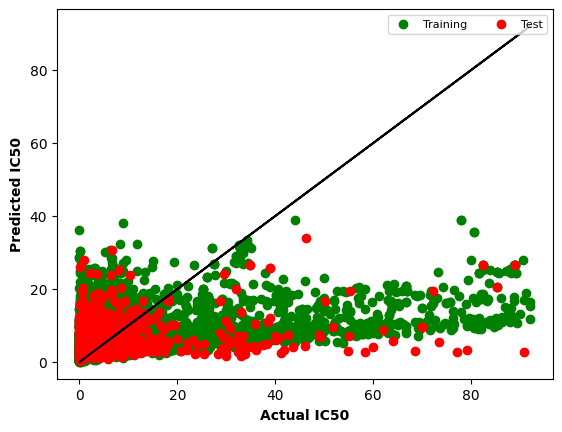

In [12]:
for n_neighbors in range(2, 20, 2):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    score(model)

model = KNeighborsRegressor(n_neighbors=12)
model.fit(X_train, Y_train)
plotter(model)